##  DENTAL METRICS GENDER PREDICTION PROJECT

##### Project Objective:
##### The goal of this project is to analyze dental measurement data and predict gender (Male/Female).
##### This is useful in forensic medicine where gender identification is required using dental metrics.


#### Project Workflow:
#### 1. Data Collection & Preprocessing
#### 2. Exploratory Data Analysis (EDA)
#### 3. Feature Engineering & Selection
#### 4. Model Training (Logistic Regression, Decision Tree, Random Forest, XGBoost)
#### 5. Model Evaluation & Comparison
#### 7. Insights & Conclusion

##### Dataset Information:
##### - Target Variable: Gender (Male/Female)
##### Independent Variables: Dental measurements (e.g., inter-canine distance, right & left canine casts)
##### Unique Identifiers: SampleID, SL No. (to be removed)


###  importing libraries

In [3]:
import pandas as pd  # For handling dataset
import numpy as np  # For numeric operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  

from sklearn.preprocessing import LabelEncoder, Normalizer  # For encoding & normalization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression  # ML Model
from sklearn.tree import DecisionTreeClassifier  # ML Model
from sklearn.ensemble import RandomForestClassifier  # ML Model
from xgboost import XGBClassifier  # ML Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc  # For model evaluation
import joblib  # for saving the model


### load dataset

In [15]:
df = pd.read_csv(r"C:\Users\Aman\Downloads\Dentistry Dataset.csv") 


In [16]:
df.head()  # display 5 rows

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [17]:
df.shape  # display how many columns or rows 

(1100, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

### data preprocessing

In [19]:
df.isnull().sum() # display all columns null values

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [21]:
df.duplicated().sum() # display this table exist duplicates

0

#### feature selection

In [22]:
df = df.drop(columns=['Sample ID'])  # drop (sample id) column

In [24]:
df = df.drop(columns=['Sl No']) # drop (Sl No) column when not use in prediction

##### encoding categorical variable

In [26]:
# Encoding the Gender column (Male = 1, Female = 0)
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

In [27]:
print(df['Gender'].unique())  # check successfully transform  show [0 - 1]

[0 1]


In [33]:
df.sample(5)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
815,24,1,27.08,27.08,7.08,7.08,7.09,7.09,0.262,0.262,0.261,0.262
1086,22,1,24.54,24.54,6.39,6.39,6.73,6.73,0.260,0.260,0.274,0.274
491,21,0,26.92,26.92,6.67,6.67,6.67,6.67,0.248,0.248,0.248,0.248
271,22,0,25.85,25.85,6.25,6.25,6.52,6.52,0.241,0.241,0.251,0.251


#### Splitting independent (X) and dependent (Y) variables


In [31]:
X = df.drop(columns=['Gender'])  # features
Y = df['Gender']  # target variable


In [32]:
# Confirm the shapes of X and Y
print("Shape of X (Features):", X.shape)
print("Shape of Y (Target):", Y.shape)


Shape of X (Features): (1100, 11)
Shape of Y (Target): (1100,)


#### Normalize the X Variable

In [35]:
# Normalize the feature variables (X)
normalizer = Normalizer()
X = normalizer.fit_transform(X)

In [36]:
# Confirm normalization
print("\nFirst 5 rows after Normalization:")
print(X[:5])  # Display  5 rows


First 5 rows after Normalization:
[[0.53936387 0.56318578 0.56296104 0.13663885 0.13663885 0.13686358
  0.13708832 0.00543859 0.00543859 0.00543859 0.00541611]
 [0.49575982 0.58094037 0.58116571 0.13813671 0.13813671 0.14264362
  0.14264362 0.00534069 0.00534069 0.00556603 0.00556603]
 [0.53997057 0.55945646 0.55945646 0.13874896 0.13992281 0.14743544
  0.14743544 0.00582229 0.00582229 0.00619792 0.00619792]
 [0.45587292 0.59537004 0.59537004 0.13858537 0.13858537 0.14952632
  0.14952632 0.00528813 0.00528813 0.00569841 0.00569841]
 [0.45276669 0.59674649 0.59787841 0.13786746 0.13786746 0.14714917
  0.14714917 0.00522946 0.00522946 0.00556903 0.00556903]]


### Exploratory Data Analysis (EDA)

In [ ]:
# plot the heatmap

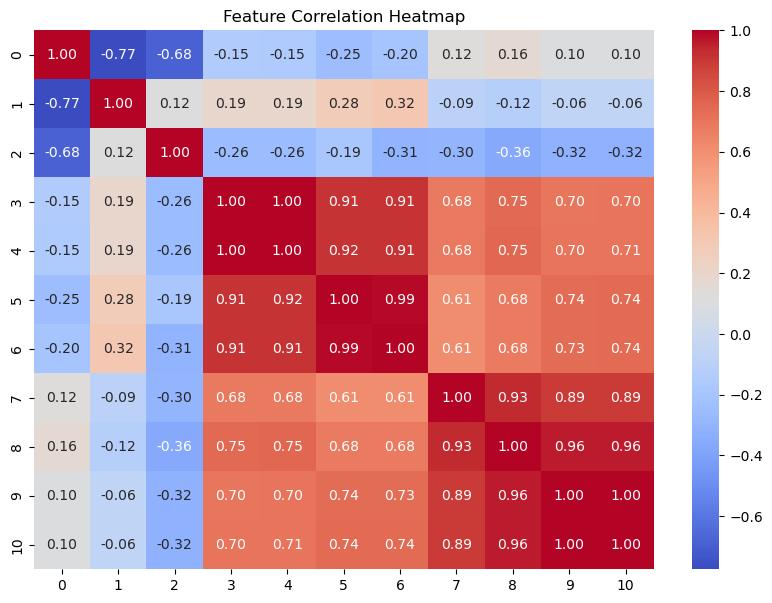

In [40]:
# Create a correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### the heatmap shows 3 highly correlated to column 4 (drop 4th number column)
### column  6 correlated with column 5  (drop 6 number column)
### and 7 correlated with 10  and 8 related with 9  (drop 8 or 9 number column)

In [44]:
# Drop Highly Correlated Features
df.drop(columns=['intercanine distance casts', 'right canine width casts', 'left canine width casts', 'right canine index intra oral'], inplace=True)

# Verify the updated DataFrame
print(df.head())


   Age  Gender  inter canine distance intraoral  right canine width intraoral  \
0   24       0                            25.06                          6.08   
1   22       0                            25.78                          6.13   
2   23       0                            23.83                          5.91   
3   20       0                            26.12                          6.08   
4   20       0                            26.36                          6.09   

   left canine width intraoral  right canine index casts  \
0                         6.09                     0.242   
1                         6.33                     0.237   
2                         6.28                     0.248   
3                         6.56                     0.232   
4                         6.50                     0.231   

   left canine index intraoral  left canine index casts  
0                        0.242                    0.241  
1                        0.247      

In [45]:
df.shape

(1100, 8)

#### Split Data into Train & Test Sets (80-20 Ratio)

In [46]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Gender'])  # Independent Variables
y = df['Gender']  # Target Variable

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Confirm Shapes of Train & Test Data
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (880, 7)
X_test Shape: (220, 7)
y_train Shape: (880,)
y_test Shape: (220,)


### Train and Compare Models

In [48]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train Model
    y_pred = model.predict(X_test)  # Predictions
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy Calculation
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print Accuracy

# Find the Best Model
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\n🚀 Best Model: {best_model} with Accuracy {accuracy_results[best_model]:.4f}")

Logistic Regression Accuracy: 0.8091
Decision Tree Accuracy: 0.8591
Random Forest Accuracy: 0.9182
XGBoost Accuracy: 0.8955

🚀 Best Model: Random Forest with Accuracy 0.9182


C:\Users\AMAN\anaconda3\_conda.exe63\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:21:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 2 best Accuracy Random Forest Accuracy: 0.9182
### XGBoost Accuracy: 0.8955

In [49]:
# Trying different hyperparameters manually
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf.fit(X_train, y_train)

# Checking accuracy
rf_accuracy = rf.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8909090909090909


In [50]:
# Trying different hyperparameters manually
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, random_state=42)
xgb.fit(X_train, y_train)

# Checking accuracy
xgb_accuracy = xgb.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.8863636363636364


In [51]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))  # 0 aur 1 ka count dekho


{0: 108, 1: 112}


### use confusion matrix to shaow predicted and actual result

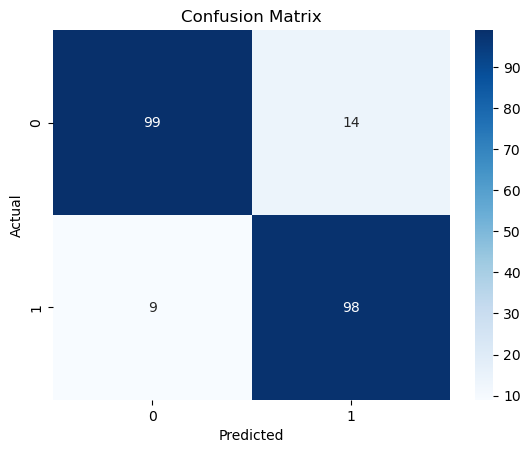

In [52]:
cm = confusion_matrix(y_test, y_pred)  # y_pred jo tumne model se nikala hai
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# conclusion of this dental gender prediction project is using random forest accuracy is best accuracy level [0.8909090909090909]